<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r1_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-normal-n-0-6-9-15-r1.csv?token=AKVFSOAZSUATTZ6DKHWNNOK64H37U')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-1-11-r1.csv?token=AKVFSOFYLJPIM2ZA6X6JWJC64H37Y')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,94,1,94,94,0,8,3,27,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,93,2,94,186,8,4,3,27,0
2,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,31,1,31,31,8,4,3,27,1
3,128,0,1,4,1,1,5,17,23,7,1,1,2,3,3,1.000000,16,92,3,94,276,0,8,20,340,0
4,129,0,1,4,2,2,5,17,23,7,1,1,2,3,3,1.000000,17,91,4,94,364,0,32,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224679,3278893,4,2,6,2,2,3,9,18,2,20,4,60215,3,1,0.333333,15,5,16,20,80,8,1445160,18,162,0
224680,3278900,4,2,6,3,2,3,9,18,2,20,4,60215,3,1,0.333333,22,4,17,20,68,8,2167740,18,162,0
224681,3278907,4,2,6,4,2,3,9,18,2,20,4,60215,3,1,0.333333,29,3,18,20,54,8,2890320,18,162,0
224682,3278914,4,2,6,5,3,3,9,18,2,20,4,60215,3,1,0.333333,36,2,19,20,38,8,5419350,18,162,0


In [6]:
df.shape

(224684, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-1-12-r1.csv?token=AKVFSOFFRJMGBGR3VCWEU7264H5SA')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-1-7-r1.csv?token=AKVFSOBMHF2KHMUJCSTNEQC64H374')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-11-12-r1.csv?token=AKVFSOHEATSH7OHVBVTRMDS64H4AC')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-7-11-r1.csv?token=AKVFSOGXOKXCV4ZQWTTFUVC64H4AI')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r1/4-fft-malicious-n-0-6-9-15-m-7-12-r1.csv?token=AKVFSOECUNR2NOTT43OZCN264H4AS')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(154778, 26)
(153839, 26)
(96361, 26)
(95526, 26)
(96368, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.084973,0.259427,0.026697,-0.039855,-0.464616,-0.378723,-0.057919,0.118880,-0.486960,-0.662023,0.053471,-0.073037,-0.023879,-0.072703,-0.047221,0.482057,0.058596,0.005526,-0.249092,0.132830
inport,-0.084973,1.000000,-0.051282,0.007433,-0.011096,-0.154188,-0.300108,-0.036253,0.351330,0.128983,0.167313,0.123518,-0.094667,-0.112309,-0.155267,-0.120588,0.709624,-0.025740,-0.129139,-0.245631,0.247290
cache_coherence_type,0.259427,-0.051282,1.000000,0.295340,-0.440905,-0.181198,-0.217407,-0.011187,0.013358,-0.099661,-0.153082,-0.374371,-0.008828,-0.028852,-0.028266,-0.017683,0.109056,0.276795,0.859085,0.408524,0.051196
flit_id,0.026697,0.007433,0.295340,1.000000,-0.052584,0.109960,0.054315,0.018678,0.023332,0.021584,0.000493,0.477302,-0.000394,0.014341,0.010462,0.008830,0.019957,0.660200,0.338803,0.252644,-0.021054
flit_type,-0.039855,-0.011096,-0.440905,-0.052584,1.000000,-0.164156,-0.081085,-0.027883,-0.034832,-0.032222,-0.000736,0.476651,-0.050601,0.031002,-0.014703,-0.010802,-0.029794,0.096970,-0.505789,-0.377165,0.031431
vnet,-0.464616,-0.154188,-0.181198,0.109960,-0.164156,1.000000,0.937254,0.086321,-0.021201,0.469903,0.526253,-0.136046,0.082852,0.103493,0.139790,0.097590,-0.310189,0.008584,0.347697,0.806679,-0.248295
vc,-0.378723,-0.300108,-0.217407,0.054315,-0.081085,0.937254,1.000000,0.082513,-0.102578,0.325959,0.375813,-0.136311,0.090373,0.123593,0.160510,0.115344,-0.411376,-0.016741,0.280519,0.787104,-0.272876
traversal_id,-0.057919,-0.036253,-0.011187,0.018678,-0.027883,0.086321,0.082513,1.000000,0.033577,0.001144,-0.013404,-0.020780,0.173892,0.174804,0.261581,0.197073,-0.052913,0.550497,0.034260,0.070211,-0.289496
hop_count,0.118880,0.351330,0.013358,0.023332,-0.034832,-0.021201,-0.102578,0.033577,1.000000,0.404443,0.033523,0.209320,-0.051939,-0.047286,-0.074435,-0.064146,0.488794,0.027667,0.001701,-0.055646,0.067668
current_hop,-0.486960,0.128983,-0.099661,0.021584,-0.032222,0.469903,0.325959,0.001144,0.404443,1.000000,0.842782,0.231801,0.022246,-0.009175,0.009806,0.002556,0.007822,-0.030186,0.149545,0.314956,-0.036422


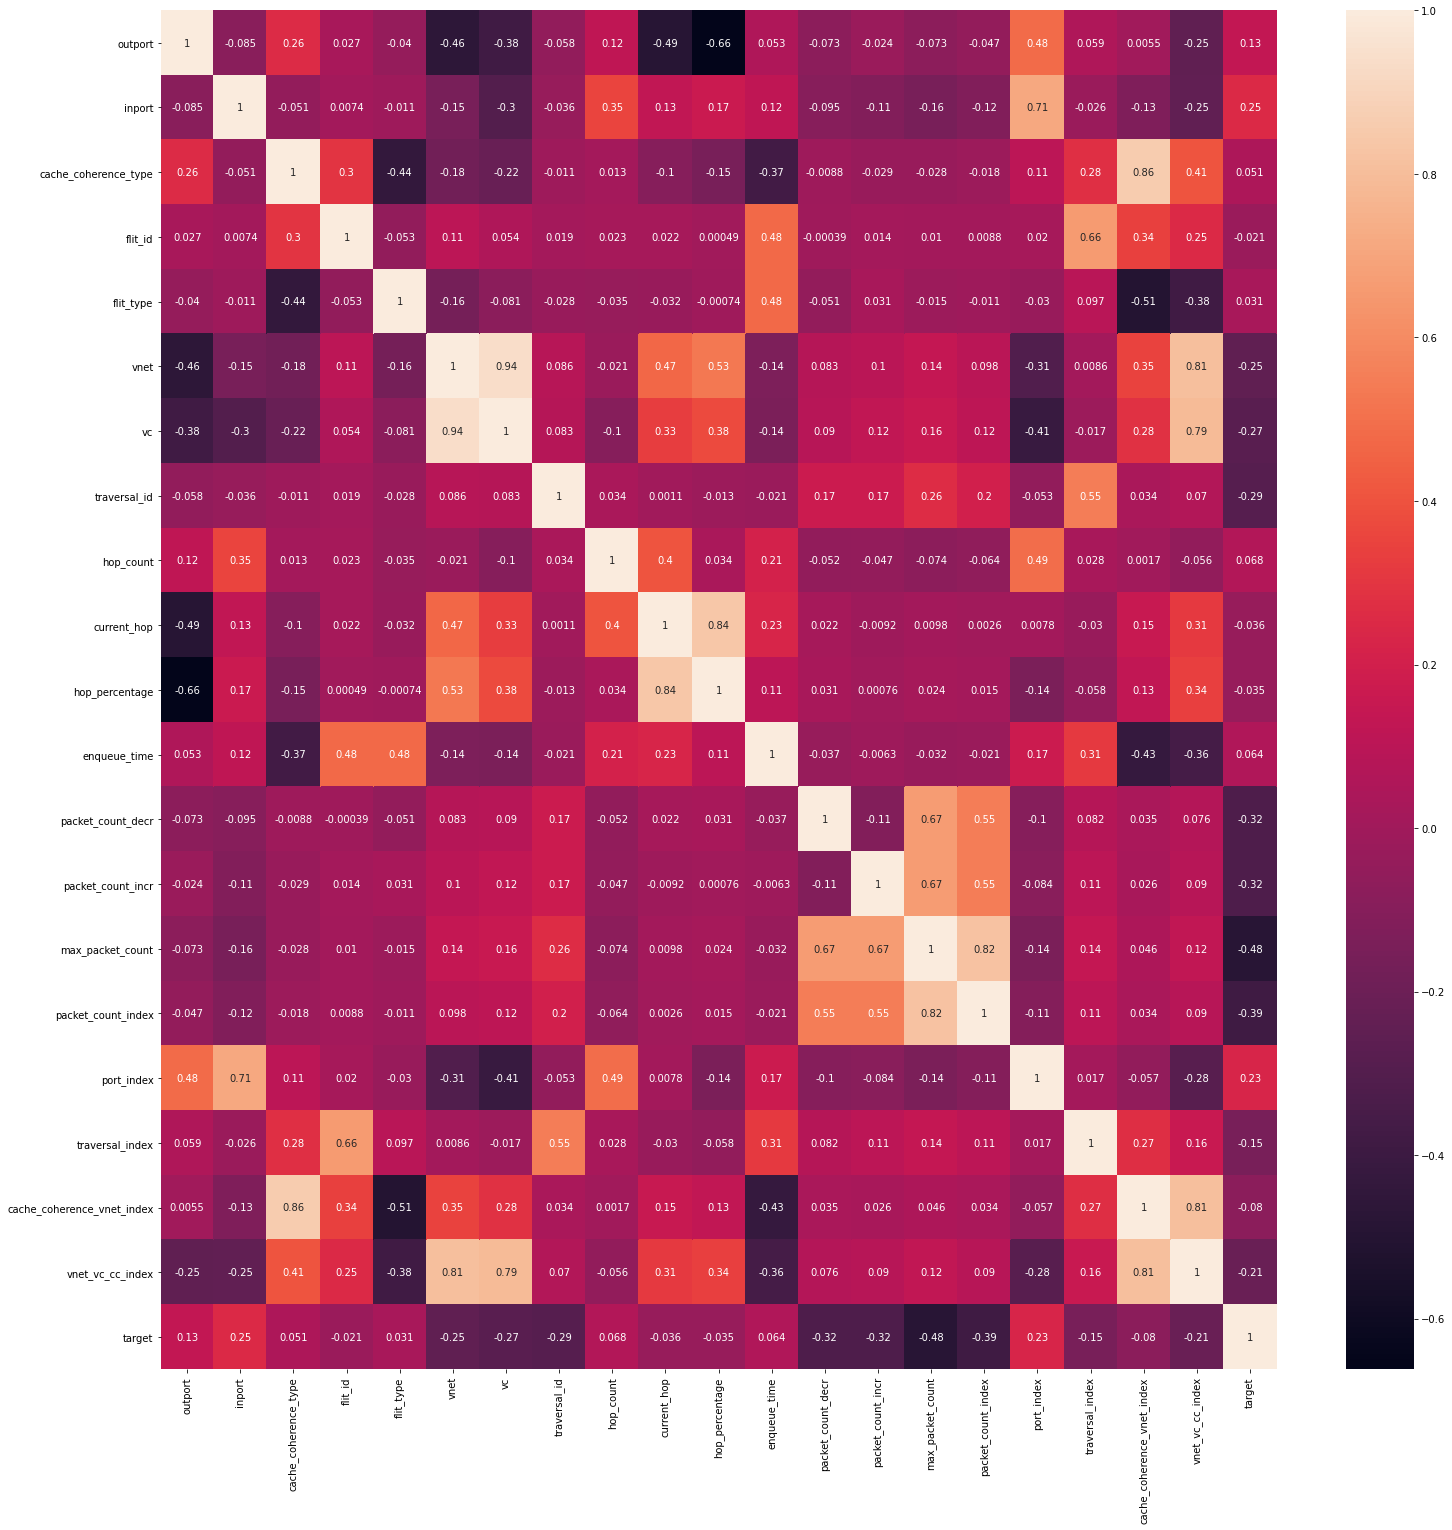

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

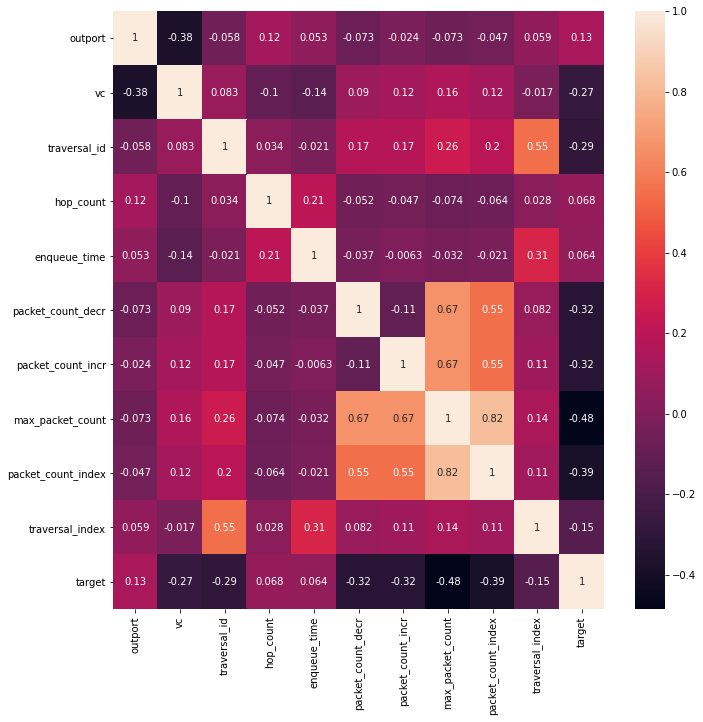

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

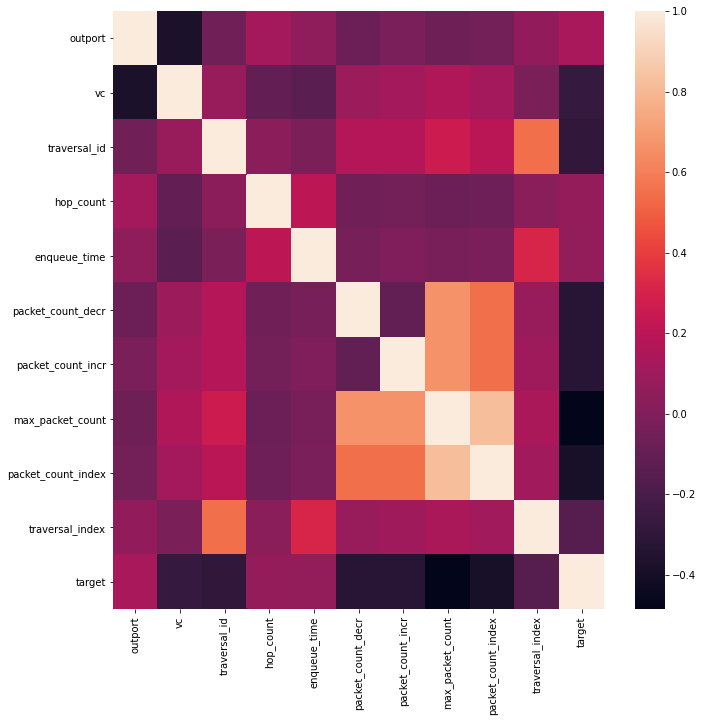

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000,0.000017,0.500000,0.000000,0.370518,0.000000,0.370518,0.005812,7.380964e-07
1,0.5,0.000,0.000000,0.666667,0.057971,0.366534,0.003984,0.370518,0.011562,0.000000e+00
2,0.5,0.000,0.000000,0.666667,0.057971,0.119522,0.000000,0.119522,0.001875,0.000000e+00
3,0.0,1.000,0.000017,0.500000,0.173913,0.362550,0.007968,0.370518,0.017186,7.380964e-07
4,0.0,1.000,0.000017,0.500000,0.188406,0.358566,0.011952,0.370518,0.022686,5.166675e-06
...,...,...,...,...,...,...,...,...,...,...
224679,1.0,0.000,0.999983,0.500000,0.159420,0.015936,0.059761,0.075697,0.004937,2.666661e-01
224680,1.0,0.000,0.999983,0.500000,0.260870,0.011952,0.063745,0.075697,0.004187,3.999996e-01
224681,1.0,0.000,0.999983,0.500000,0.362319,0.007968,0.067729,0.075697,0.003312,5.333330e-01
224682,1.0,0.000,0.999983,0.500000,0.463768,0.003984,0.071713,0.075697,0.002312,1.000000e+00


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000,0.000017,0.500000,0.000000,0.443396,0.000000,0.443396,0.008211,7.377411e-07
1,0.5,0.000,0.000000,0.666667,0.062500,0.438679,0.004717,0.443396,0.016335,0.000000e+00
2,0.0,1.000,0.000017,0.500000,0.187500,0.433962,0.009434,0.443396,0.024284,7.377411e-07
3,0.0,1.000,0.000017,0.500000,0.203125,0.429245,0.014151,0.443396,0.032058,5.164188e-06
4,0.0,1.000,0.000017,0.500000,0.218750,0.424528,0.018868,0.443396,0.039658,8.115153e-06
...,...,...,...,...,...,...,...,...,...,...
154773,1.0,0.000,0.999983,0.500000,0.171875,0.018868,0.070755,0.089623,0.006901,2.666661e-01
154774,1.0,0.000,0.999983,0.500000,0.281250,0.014151,0.075472,0.089623,0.005853,3.999996e-01
154775,1.0,0.000,0.999983,0.500000,0.390625,0.009434,0.080189,0.089623,0.004630,5.333330e-01
154776,1.0,0.000,0.999983,0.500000,0.500000,0.004717,0.084906,0.089623,0.003232,1.000000e+00


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    153719
1     70965
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
1                  vc  5985.508932
7    max_packet_count  4157.960452
8  packet_count_index  3093.968892
2        traversal_id  2125.202558
5   packet_count_decr  2092.545689
6   packet_count_incr  2065.439315
0             outport   898.119248
9     traversal_index   610.312882
4        enqueue_time    59.912552
3           hop_count    56.173520


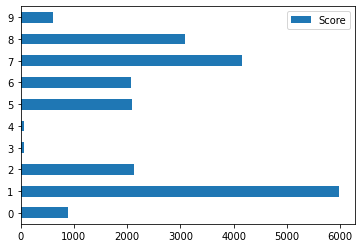

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.92145504789488
Test Prediction Score 97.11110511693147


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.55600925196087
Test Prediction Score 89.97523384837395
Test Prediction Score 85.2409169684831
Test Prediction Score 86.68844084333061
Test Prediction Score 84.06836294205546


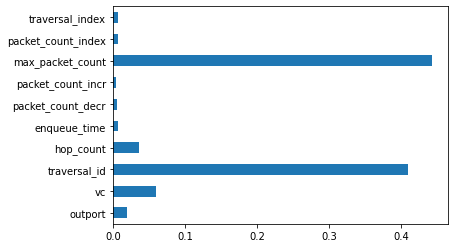

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

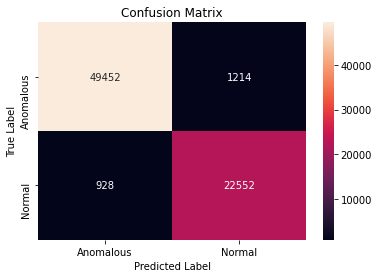

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     50666
           1       0.95      0.96      0.95     23480

    accuracy                           0.97     74146
   macro avg       0.97      0.97      0.97     74146
weighted avg       0.97      0.97      0.97     74146



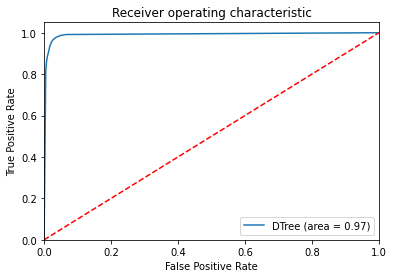

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r1l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.88805869500715


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 91.60410394242075
Test Prediction Score 92.72226158516371
Test Prediction Score 87.89551789624433
Test Prediction Score 88.85957749722589
Test Prediction Score 85.87601693508219


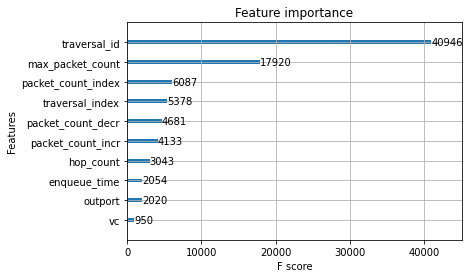

In [47]:
plot_importance(xgbc)
plt.show()

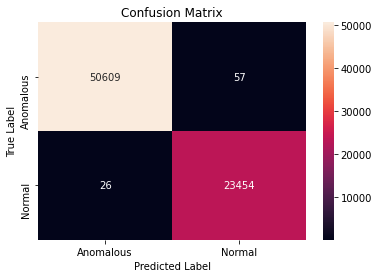

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50666
           1       1.00      1.00      1.00     23480

    accuracy                           1.00     74146
   macro avg       1.00      1.00      1.00     74146
weighted avg       1.00      1.00      1.00     74146



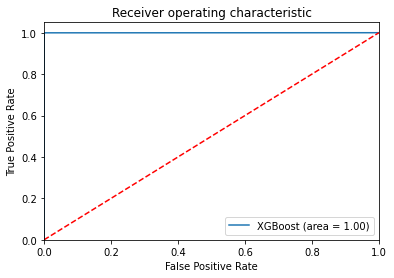

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()